In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
from glob import glob

In [2]:
#Reference the file where the CSV is located
poverty_path= "../Resources/poverty_stats.csv"

#Import the data into a pandas DataFrame
poverty_df=pd.read_csv(poverty_path, encoding= "UTF-8")
poverty_df

,Year,State FIPS,Postal Code,Name,Poverty Estimate All Ages,90% CI Lower Bound,90% CI Upper Bound,Poverty Percent All Ages,90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,Poverty Estimate Ages 0-4,90% CI Lower Bound.7,90% CI Upper Bound.7,Poverty Percent Ages 0-4,90% CI Lower Bound.8,90% CI Upper Bound.8
0,2003,0,US,United States,"35,861,170","35,190,401","36,531,939",12.5,12.2,12.7,...,16.6,"43,318","43,009","43,627","4,021,366","3,817,517","4,225,215",20.3,19.3,21.4
1,2003,1,AL,Alabama,"677,455","644,647","710,263",15.3,14.5,16.0,...,22.5,"36,131","34,659","37,602","72,477","62,361","82,594",24.7,21.3,28.2
2,2003,2,AK,Alaska,"63,126","58,920","67,332",9.8,9.2,10.5,...,12.0,"52,391","50,764","54,018","7,651","6,153","9,148",15.6,12.5,18.6
3,2003,4,AZ,Arizona,"783,005","736,508","829,502",13.9,13.1,14.7,...,21.8,"41,963","40,557","43,368","92,147","75,773","108,522",20.9,17.2,24.7
4,2003,5,AR,Arkansas,"432,240","410,707","453,774",16.0,15.2,16.8,...,23.4,"33,445","31,994","34,895","49,523","42,786","56,260",27.2,23.5,30.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2020,51,VA,Virginia,"769,479","747,641","791,317",9.2,8.9,9.5,...,12.0,"79,154","78,336","79,972","67,255","61,585","72,925",13.7,12.5,14.9
932,2020,53,WA,Washington,"714,653","692,072","737,234",9.5,9.2,9.8,...,10.9,"80,319","79,334","81,304","53,387","47,813","58,961",12.2,10.9,13.5
933,2020,54,WV,West Virginia,"274,176","264,703","283,649",15.8,15.3,16.3,...,20.2,"49,202","48,077","50,327","19,960","18,165","21,755",22.8,20.7,24.9
934,2020,55,WI,Wisconsin,"571,049","554,353","587,745",10.0,9.7,10.3,...,12.1,"64,901","64,276","65,526","45,185","41,504","48,866",14.2,13.0,15.4


In [3]:
poverty_df.columns

Index(['Year', 'State FIPS', 'Postal Code', 'Name',
       'Poverty Estimate All Ages', '90% CI Lower Bound', '90% CI Upper Bound',
       'Poverty Percent All Ages', '90% CI Lower Bound.1',
       '90% CI Upper Bound.1', 'Poverty Estimate Ages 0-17',
       '90% CI Lower Bound.2', '90% CI Upper Bound.2',
       'Poverty Percent Ages 0-17', '90% CI Lower Bound.3',
       '90% CI Upper Bound.3', 'Poverty Estimate Ages 5-17',
       '90% CI Lower Bound.4', '90% CI Upper Bound.4',
       'Poverty Percent Ages 5-17', '90% CI Lower Bound.5',
       '90% CI Upper Bound.5', 'Median Household Income',
       '90% CI Lower Bound.6', '90% CI Upper Bound.6',
       'Poverty Estimate Ages 0-4', '90% CI Lower Bound.7',
       '90% CI Upper Bound.7', 'Poverty Percent Ages 0-4',
       '90% CI Lower Bound.8', '90% CI Upper Bound.8'],
      dtype='object')

In [4]:
reduced_poverty_df=poverty_df.loc[:, ["Year", "State FIPS", "Postal Code", "Name","Poverty Percent All Ages", 
                                      "Median Household Income","Poverty Estimate Ages 5-17", "Poverty Percent Ages 5-17",
                                     ]]
reduced_poverty_df.head()

,Year,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
0,2003,0,US,United States,12.5,"43,318","8,399,573",16.1
1,2003,1,AL,Alabama,15.3,"36,131","165,578",21.0
2,2003,2,AK,Alaska,9.8,"52,391","14,330",10.7
3,2003,4,AZ,Arizona,13.9,"41,963","213,295",19.8
4,2003,5,AR,Arkansas,16.0,"33,445","105,100",21.7


In [5]:
reduced_poverty_df.dtypes

Year                            int64
State FIPS                      int64
Postal Code                    object
Name                           object
Poverty Percent All Ages      float64
Median Household Income        object
Poverty Estimate Ages 5-17     object
Poverty Percent Ages 5-17     float64
dtype: object

In [6]:
reduced_poverty_df=reduced_poverty_df.loc[(reduced_poverty_df["State FIPS"]==0)]
reduced_poverty_df.head()


,Year,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
0,2003,0,US,United States,12.5,"43,318","8,399,573",16.1
52,2004,0,US,United States,12.7,"44,334","8,430,886",16.2
104,2005,0,US,United States,13.3,46242,8765541,17.0
156,2006,0,US,United States,13.3,48451,8700048,16.7
208,2007,0,US,United States,13.0,50740,8499844,16.4


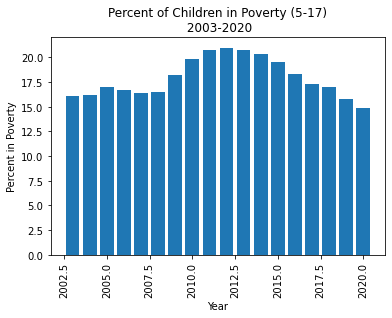

In [22]:
x=reduced_poverty_df["Year"]
y=reduced_poverty_df["Poverty Percent Ages 5-17"]
plt.bar(x, y)
plt.xlabel("Year")
plt.ylabel("Percent in Poverty")
# xticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
# set_xticklabels(["2003", "2004", "2005", "2006", "2007", "2008","2009", "2010", "2011", "2012",
#                 "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])
plt.xticks(rotation=90)
plt.title("Percent of Children in Poverty (5-17)\n 2003-2020")
plt.show()

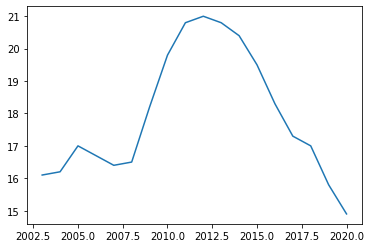

In [23]:
plt.plot(x,y)
plt.show()

In [17]:
year=[2005, 2010, 2015, 2020]

# Create empty list to fill with tumor vol data (for plotting)
poverty_percent=[]

for x in year:
    poverty= reduced_poverty_df.loc[reduced_poverty_df["Year"]==x,"Poverty Percent Ages 5-17"]
    poverty_percent.append(poverty)
    


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

 # Locate the rows which contain mice on each drug and get the tumor volumes

    quartiles=poverty.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq

 # add subset


 # Determine outliers using upper and lower bounds
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)

    outliers=poverty.loc[(poverty>upper_bound)|(poverty<lower_bound)]
    outliers
    print(f'{x}\'s  potential outliers: {outliers}')

2005's  potential outliers: Series([], Name: Poverty Percent Ages 5-17, dtype: float64)
2010's  potential outliers: Series([], Name: Poverty Percent Ages 5-17, dtype: float64)
2015's  potential outliers: Series([], Name: Poverty Percent Ages 5-17, dtype: float64)
2020's  potential outliers: Series([], Name: Poverty Percent Ages 5-17, dtype: float64)


In [20]:
poverty_percent

[104    17.0
 Name: Poverty Percent Ages 5-17, dtype: float64,
 364    19.8
 Name: Poverty Percent Ages 5-17, dtype: float64,
 624    19.5
 Name: Poverty Percent Ages 5-17, dtype: float64,
 884    14.9
 Name: Poverty Percent Ages 5-17, dtype: float64]

KeyError: 0

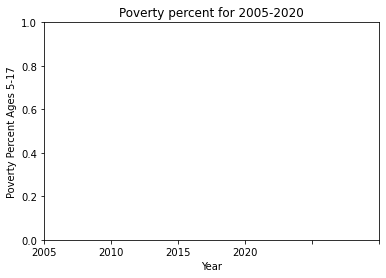

In [19]:
fig1, ax1=plt.subplots()
ax1.set_xlabel("Year")
ax1.set_ylabel("Poverty Percent Ages 5-17")
ax1.set_title("Poverty percent for 2005-2020")
xticks=[1,2,3,4]
ax1.set_xticklabels(["2005", "2010", "2015", "2020"])
ax1.boxplot(poverty_percent)
plt.show()